# Demonstration of API to get flux limits

## Extracting a sensitivity cube from the HDF5

After installing the HETDEX API we can import the tools to read the
HDF5 sensivity cube containers

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt
from hetdex_api.flux_limits.hdf5_sensitivity_cubes import SensitivityCubeHDF5Container

hdfcont = SensitivityCubeHDF5Container(filename="20181203_v013_sensitivity_cubes.h5")


 Now the container is read in we can extract a particular IFU like this. Note that you have to add the string 'ifuslot\_' to the three digit IFU slot. The `datevshot` is optional when only one shot flux limit is stored in a file (the default). Note that you have to append 'virus\_' to the datevshot. 

In [12]:
scube = hdfcont.extract_ifu_sensitivity_cube("ifuslot_036", datevshot="virus_20181203v013")

## Using the sensitivity cube

Now we have the `SensitivityCube` object we can extract a flux limit, in erg/s/cm^2 from it like this

In [13]:
# RA DEC (in degrees) Wavelength (Angstrom)
scube.get_f50(20.7384244, 0.4019458, 4240)

1.12e-17

Locations out of range return 999, e.g.

In [14]:
scube.get_f50(120.7384244, 13.4019458, 42400)

999.0

Of course we can also pass an arrays of coordinates, to get multiple results, e.g. to plot the flux limit versus wavelength

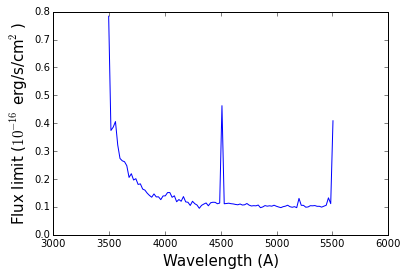

In [15]:
from numpy import linspace
wls = linspace(3495.0, 5505.0, 100)
flims = scube.get_f50(20.7384244, 0.4019458, wls)
plt.plot(wls[flims < 999], flims[flims < 999]*1e16)
plt.xlabel("Wavelength (A)", fontsize=15.0)
plt.ylabel("Flux limit ($10^{-16}$ erg/s/cm$^2$)", fontsize=15.0)

To get the fraction of sources detected at a particular flux, rather than just the flux limit value one can use this method

In [16]:
# RA DEC (in degrees) Wavelength (Angstrom) Flux (cgs)
scube.return_completeness(1.1e-17, 20.7384244, 0.4019458, 4245)

0.34033236687316765

This completeness is computed using a functional form, this function takes two parameters the flux limit and a slope which controls how quickly completeness falls off. The latter is fixed to our best guess in this version of the API (**this means it might not be all that accurate!**), in the future this will all be better tested. By definition the flux limit stored in the cubes corresponds to 50% completeness, i.e.

In [17]:
flux = scube.get_f50(20.7384244, 0.4019458, 4245)
scube.return_completeness(flux, 20.7384244, 0.4019458, 4245)

0.5

To finish off, here is a plot of the completeness versus flux at some position. Note we use the flux limit computed above to define the range of the plot

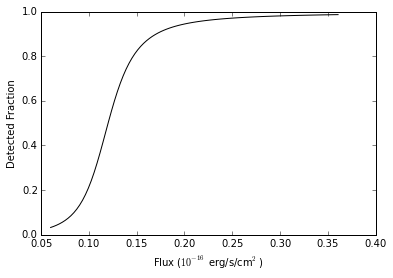

In [18]:
fluxes = linspace(0.5*flux, 3.0*flux, 100)
compl = scube.return_completeness(fluxes, 20.7384244, 0.4019458, 4245)
plt.plot(fluxes*1e16, compl, "k-")
plt.xlabel("Flux ($10^{-16}$ erg/s/cm$^2$)")
plt.ylabel("Detected Fraction")